# optimizations

In [2]:
par(family  = "Arial")
#install.packages("showtext")
library(showtext)
showtext_auto()
options(repr.plot.width=5, repr.plot.height=5)

In [3]:
library(mvtnorm)
vnorm.data<-rmvnorm(10000,mean=c(0,0),sigma=rbind(c(1,0.8),c(0.8,1)))
x <- y <- seq(-8, 8, len = 200)
X <- expand.grid(x = x, y = y)
X <- within(X, z <- dnorm(x,mean =  -2.5)*dnorm(y) + 0.5*dnorm(x, 2.5)*dnorm(y))


In [4]:
z <- matrix(X$z, nrow = 200)
pdf("bivarNorm.pdf");persp(x, y, z, col = "lightblue", border = NA,
   theta = 20, phi = 20, ticktype = "detailed", 
   ltheta = -120, shade = 0.25);dev.off()
   

png 
  2

In [5]:
length(z[1,])

[1] 200

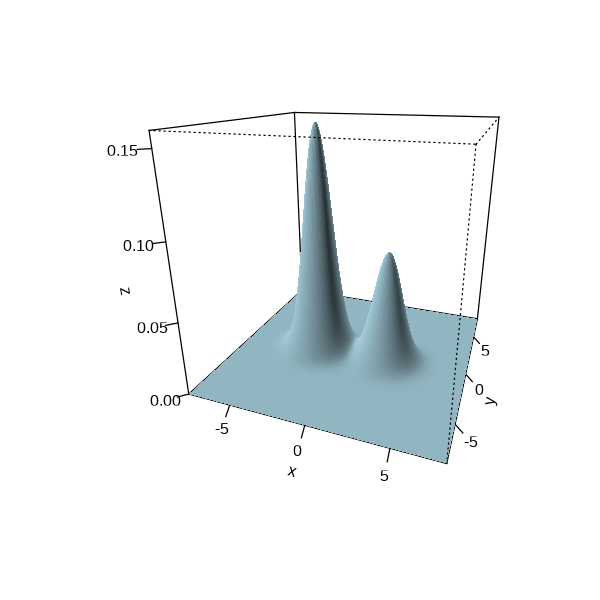

In [6]:
persp(x, y, z, col = "lightblue", border = NA,
   theta = 20, phi = 20, ticktype = "detailed", 
   ltheta = -120,shade = 0.25)

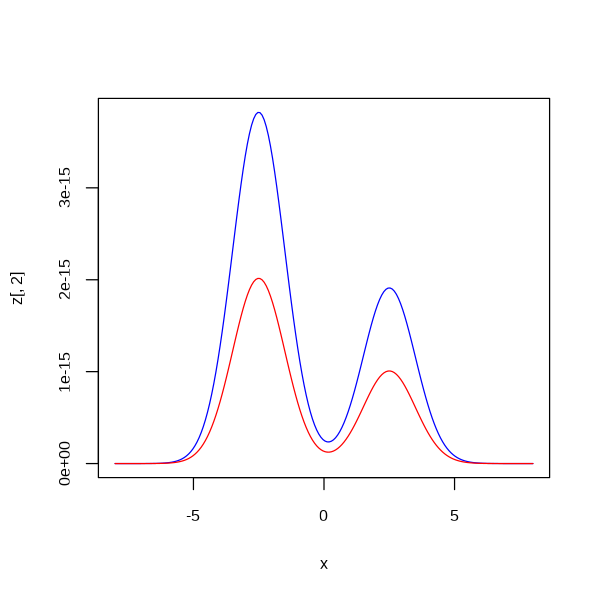

In [7]:
plot(x,z[,2],type = 'l',col = 'blue')
lines(y,z[,1],col = 'red')


# 1D optimization

In [ ]:
## The Golden Section Search Method
f <- function(x) {
  x^2 + x - 2*sqrt(x)
}
curve(f, from = 0, to = 2)
golden <- function (f, a, b, tol = 0.0000001)
{
  ratio <- 2 / (sqrt(5) + 1)  # Alpha value
  x1 <- b - ratio * (b - a)  
  x2 <- a + ratio * (b - a)
  f1 <- f(x1)
  f2 <- f(x2)
  while(abs(b - a) > tol) {
    if (f2 > f1) {
      b <- x2
      x2 <- x1
      f2 <- f1
      x1 <- b - ratio * (b - a)
      f1 <- f(x1)
    }
    else {
      a <- x1
      x1 <- x2
      f1 <- f2
      x2 <- a + ratio * (b - a)
      f2 <- f(x2)
    }
  }
  return((a + b) / 2)
}
golden(f, 0, 2)

## Steepest Descent Algorithm
steepestdescent <- function(f, fprime, start, h,
                            tol=1e-7, maxiter=100) {
  x <- start
  g <- function(alpha) {
    f(x - alpha*fpx)
  }
  niter <- 0
  while(niter < maxiter & sum(abs(fprime(x))) > tol) {
    fpx <- fprime(x)
    alpha <- golden(g, 0, h)
    x <- x - alpha*fpx
    niter <- niter + 1
  }
  if (niter == maxiter) {
    print("Warning: Maximum number of iterations reached")
  }
  c("Minimizer" = x)
}

f1 <- function(x) {
  (2-x[1])^2/(2*x[2]^2) +
    (3-x[1])^2/(2*x[2]^2) + log(x[2])
}
f1prime <- function(x) {
  c(-(2-x[1])/x[2]^2 - (3-x[1])/x[2]^2,
    -(2-x[1])^2/x[2]^3 -
      (3-x[1])^2/x[2]^3 + 1/x[2])
}
steepestdescent(f1, f1prime, start=c(.1,.1), h=.1)
steepestdescent(f1, f1prime,start=c(2.4992967, 0.7123675), h=.1)
steepestdescent(f1, f1prime, start=c(.1, .1), h=.1,maxiter=125)

## Newton-Raphson Method

Newton <- function(fprime, f2prime, x, tol=1e-7, maxit=10) {
  niter <- 0
  while(niter < maxit) {
    fpx <- fprime(x)
    f2px <- f2prime(x)
    x <- x - fpx/f2px
    if (abs(fpx) < tol) break
    niter <- niter+1
  }
  if (niter == maxit) {
    print("Warning: Iteration limit exceeded in Newton")
  }
  x
}

steepestdescentNewton <- function(f, fprime, f2prime,
                                  start, alpha0, tol=1e-7, maxiter=100) {
  gprime <- function(alpha) -fpx%*%fprime(x-alpha*fpx)
  g2prime <- function(alpha) fpx%*%f2prime(x-alpha*fpx)%*%fpx
  x <- start; niter <- 0
  while(niter < maxiter & sum(abs(fprime(x))) > tol) {
    fpx <- fprime(x)
    alpha <- Newton(fprime=gprime, f2prime=g2prime, x=alpha0)
    x <- x - alpha*fpx
    niter <- niter + 1
  }
  if (niter == maxiter) {
    print("Warning: Maximum number of iterations reached")
  }
  c("Minimizer" = x)
}

f2prime <- function(x) {
  matrix(c(2/x[2]^2, 2*(2-x[1])/x[2]^3 +
             2*(3-x[1])/x[2]^3,
           2*(2-x[1])/x[2]^3 +2*(3-x[1])/x[2]^3,
           3*(2-x[1])^2/x[2]^4 + 3*(3-x[1])^2/x[2]^4),
         nrow=2)
}

steepestdescentNewton(f1, f1prime, f2prime, c(1.1,.5), .01)
steepestdescentNewton(f1, f1prime, f2prime, c(1.1,.5), .1)
steepestdescentNewton(f1, f1prime, f2prime, c(1.5,.5), .1)

## Nelder-Mead Simplex Method
x <- seq(0, 5, len=20)
y <- seq(0, 5, len=20)
z <- outer(x, y, f)
contour(x, y, z)

f <- function(x, y) ((x-y)^2 + (x-2)^2 + (y-3)^4)/10
x <- seq(-3,5,len=20)
y <- seq(0,5,len=20)
z <- outer(x, y, f)
contour(x,y,z)
x <- matrix(c(0, 0, 2, 0, 2, 0), 3, 2)
polygon(x)

library("nloptr")
psf <- function(x)  (x[1] + 10*x[2])^2 + 5*(x[3] - x[4])^2 + 
  (x[2] - 2*x[3])^4 + 10*(x[1] - x[4])^4
x0 <- c(3, -1, 0, 1)
neldermead(x0, psf) 

## Other Functions For Optimization

# There are other functions in R for general function optimization: nlm() and nlminb().
# In most cases optim() is preferred because it is more fexibility, but there may be instances where
# one of the others performs better.
# The constrOptim() function is aimed at cases where there are linear inequalities expressing 
# constraints on the parameters.

## Solving linear programming problems in R

library(lpSolve)
eg.lp <- lp(objective.in=c(5, 8), const.mat=
              matrix(c(1, 1, 1, 2), nrow=2),
            const.rhs=c(2, 3), const.dir=c(">=", ">="))
eg.lp
eg.lp$solution


![GeldenSearch](images/golden.png)


$minimum
[1] 0.3333333

$objective
[1] 0

[1] 3.81966
[1] 6.18034
[1] 2.36068
[1] 2.077939
[1] 1.505823
[1] 0.9306496
[1] 0.9196752
[1] 0.772905
[1] 0.4776816
[1] 0.6491436
[1] 0.656315
[1] 0.6653777
[1] 0.6667786
[1] 0.6666728
[1] 0.6666321
[1] 0.6667135
[1] 0.6666728


$minimum
[1] 0.6666728

$objective
[1] -0.1481481

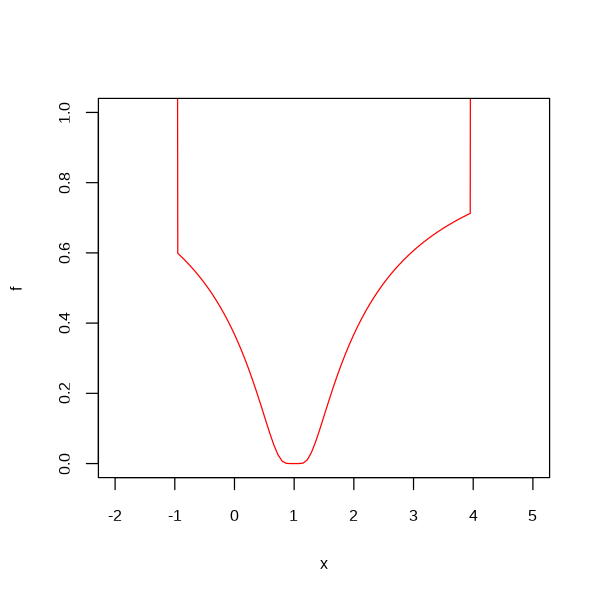

In [8]:
## from ?optmize
require(graphics)
     
f <- function (x, a) (x - a)^2
xmin <- optimize(f, c(0, 1), tol = 0.0001, a = 1/3)
print(xmin)
     
## See where the function is evaluated:
optimize(function(x) x^2*(print(x)-1), lower = 0, upper = 10)
     
## "wrong" solution with unlucky interval and piecewise constant f():
f  <- function(x) ifelse(x > -1, ifelse(x < 4, exp(-1/abs(x - 1)), 10), 10)
fp <- function(x) { print(x); f(x) }
     
plot(f, -2,5, ylim = 0:1, col = 2)


In [9]:
xmin1<-optimize(fp, c(-4, 20))   # doesn't see the minimum
print("sssssssssssssssssssssssss")
print(xmin1)
print("=========================")
xmin2<-optimize(fp, c(-7, 20))   # ok
print("sssssssssssssssssssssssss")
print(xmin2)

[1] 5.167184
[1] 10.83282
[1] 14.33437
[1] 16.49845
[1] 17.83592
[1] 18.66253
[1] 19.1734
[1] 19.48913
[1] 19.68427
[1] 19.80487
[1] 19.8794
[1] 19.92547
[1] 19.95393
[1] 19.97153
[1] 19.9824
[1] 19.98913
[1] 19.99328
[1] 19.99585
[1] 19.99743
[1] 19.99841
[1] 19.99902
[1] 19.99939
[1] 19.99963
[1] 19.99977
[1] 19.99986
[1] 19.99991
[1] 19.99995
[1] 19.99995
[1] "sssssssssssssssssssssssss"
$minimum
[1] 19.99995

$objective
[1] 10

[1] "========================="
[1] 3.313082
[1] 9.686918
[1] -0.6261646
[1] 1.244956
[1] 1.250965
[1] 0.771827
[1] 0.2378417
[1] 1.000451
[1] 0.9906964
[1] 0.9955736
[1] 0.9980122
[1] 0.9992315
[1] 0.9998411
[1] 0.9996083
[1] 0.9994644
[1] 0.9993754
[1] 0.9993204
[1] 0.9992797
[1] 0.9992797
[1] "sssssssssssssssssssssssss"
$minimum
[1] 0.9992797

$objective
[1] 0



## Optim ()


optim(par, fn, gr = NULL, ..., 

      method = c("Nelder-Mead", "BFGS", "CG", "L-BFGS-B", "SANN",
                 "Brent"), 
                 
      lower = -Inf, upper = Inf, 
      
      control = list(), hessian = FALSE)

$par
[1] -15.81499

$value
[1] 67.46795

$counts
function gradient 
   20000       NA 

$convergence
[1] 0

$message
NULL

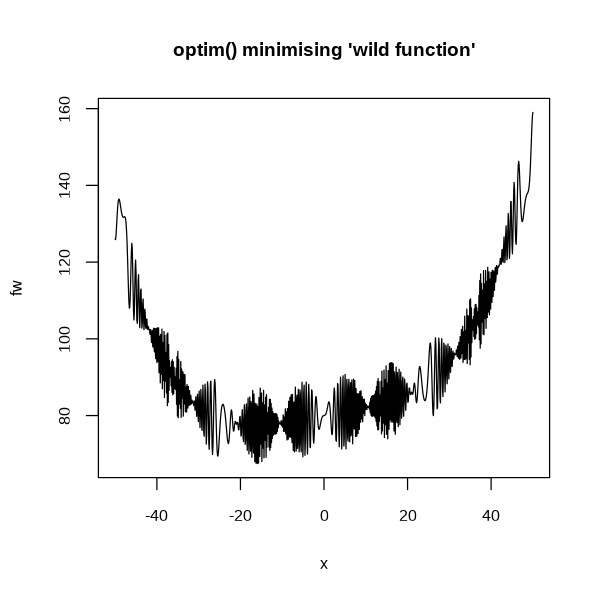

In [10]:
## "wild" function , global minimum at about -15.81515
fw <- function (x)
         10*sin(0.3*x)*sin(1.3*x^2) + 0.00001*x^4 + 0.2*x+80
plot(fw, -50, 50, n = 1000, main = "optim() minimising 'wild function'")
# method = c("Nelder-Mead", "BFGS", "CG", "L-BFGS-B", "SANN","Brent")     
res <- optim(50, fw, method = "SANN",lower = -Inf, upper = Inf, 
             control = list(maxit = 20000, temp = 20, parscale = 20), hessian = FALSE)
# res$par= -15.8144, res$value=67.47249, res$$counts["function"]=20000,res$$counts["gradient"]=NA, res$convergence=0 (did!), res$message=NULL


res


# LAB2

# 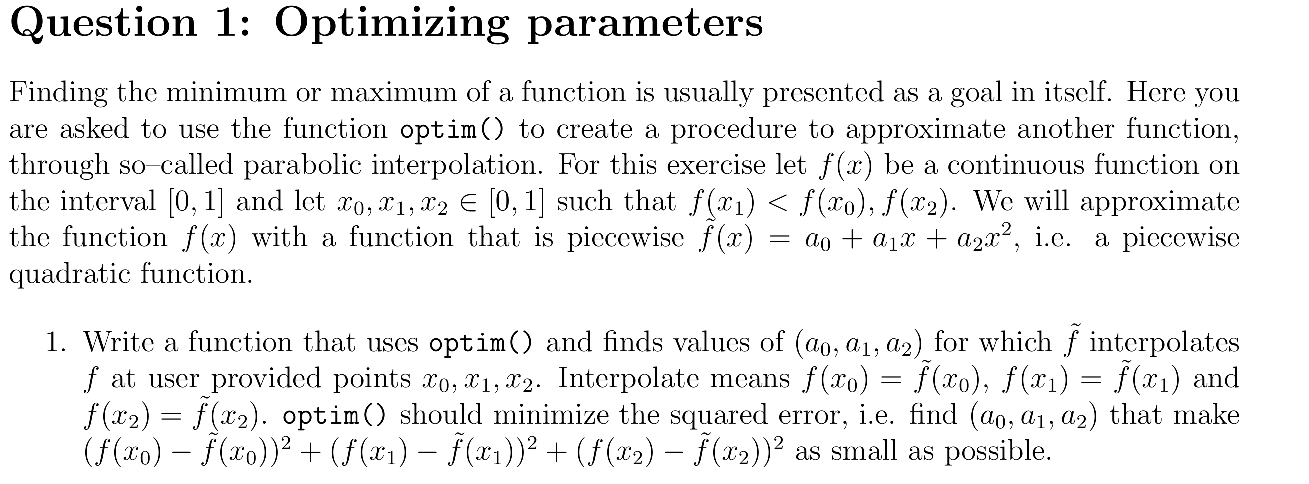

In [11]:
interpolate = function(par,x){
    a0 = par[1]
    a1 = par[2]
    a2 = par[3]
    
    f.tilda = a0 + a1*x + a2 * (x**2)
    return (f.tilda)
}

In [12]:
objective = function(par, x,func){
    
    x0 = x[1]
    x1 = x[2]
    x2 = x[3]
    
    res = sum((func(x0) - interpolate(par,x0))**2 ,( func(x1) - interpolate(par,x1))**2, 
              (func(x2) - interpolate(par,x2))**2)
    return(res)
}

In [13]:
Opt_func = function(x,func){
    
    init = c(0,0,0)
    OptRes = optim(init,fn = objective,x=x,func=func)
    return(OptRes$par)
}

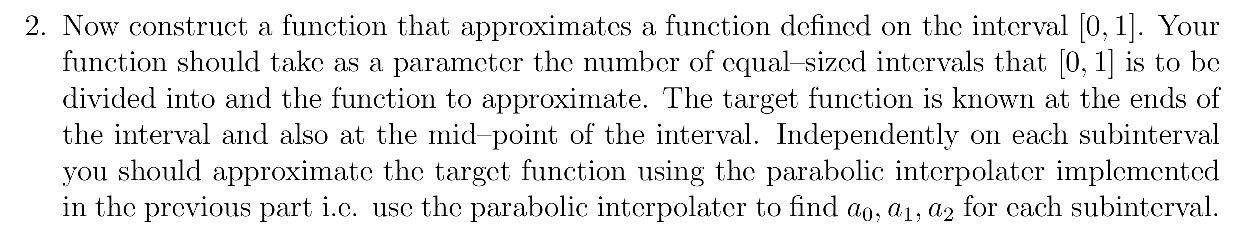

In [14]:
approx.fun = function(n,func){
    interval_len = 1/(n)
    midpoint_pos = 1/(2*n)
    
    x = t(sapply(1:n,function(i){c(i/n - interval_len, i/n - midpoint_pos, i/n)}))
   sub_coef = matrix(NA,nrow = n,ncol = 3)
    for(i in 1:n){
        sub_coef[i,] = Opt_func(x = x[i,],func =func)
    }
    return(sub_coef)

}

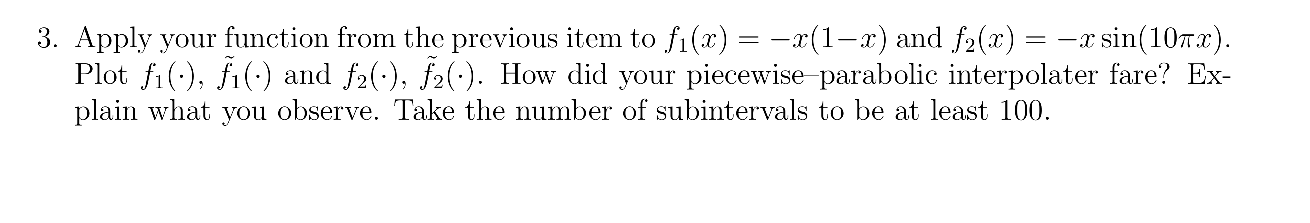

In [15]:
n = 100
f1 = function(x){
res = -x *(1-x)
return(res)
}

f2 = function(x){
    res = -x*sin(10*pi*x)
    return(res)
}

In [16]:
a = approx.fun(n = n,func = f1)
x=seq(0,1,length.out = n)

interRes = numeric(n) 
for(i in 1:n){
    
    interRes[i] = interpolate(a[i,],x[i])
    
}

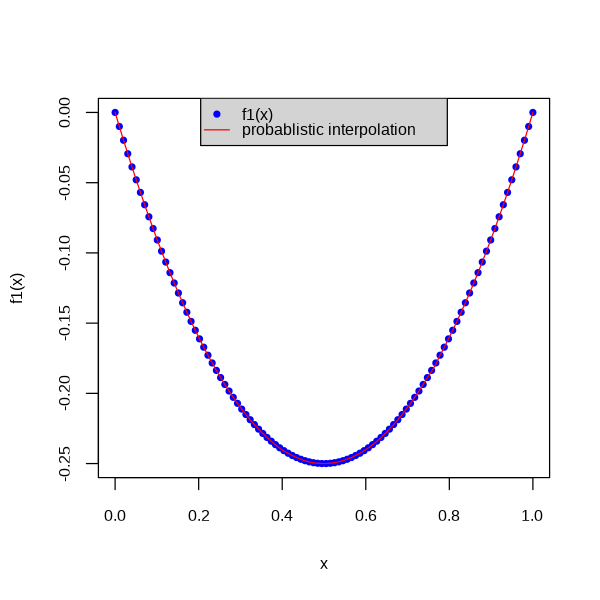

In [17]:
plot(x,f1(x),pch = 20,col='blue')
lines(x,interRes,col = 'red')
legend('top',legend = c('f1(x)','probablistic interpolation' ),
       col = c('blue','red'),pch = c(20,NA),lty=c(NA,1),bg='lightgrey')

In [18]:
a2 = approx.fun(n = n,func = f2)
x=seq(0,1,length.out = n)

interRes2 = numeric(n) 
for(i in 1:n){
    
    interRes2[i] = interpolate(a2[i,],x[i])
    
}

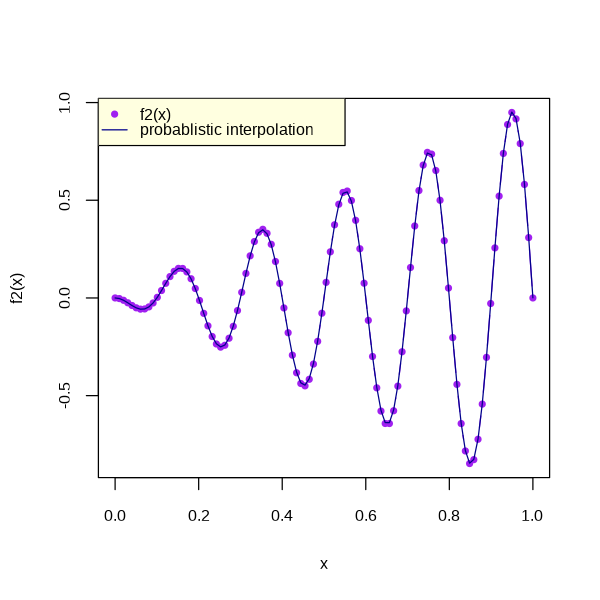

In [19]:
plot(x,f2(x),pch=20,col='purple',type = "b")
lines(x,interRes2,col = 'darkblue')
legend('topleft',legend = c('f2(x)','probablistic interpolation' ),
       col = c('purple','darkblue'),pch = c(20,NA),lty=c(NA,1),bg='lightyellow')

The quadratic interpolation is good enough when we have intervals that are small enough for the optim
function to find suitable parameters. It is difficult to notice a difference between the target function and our
interpolated approximation.


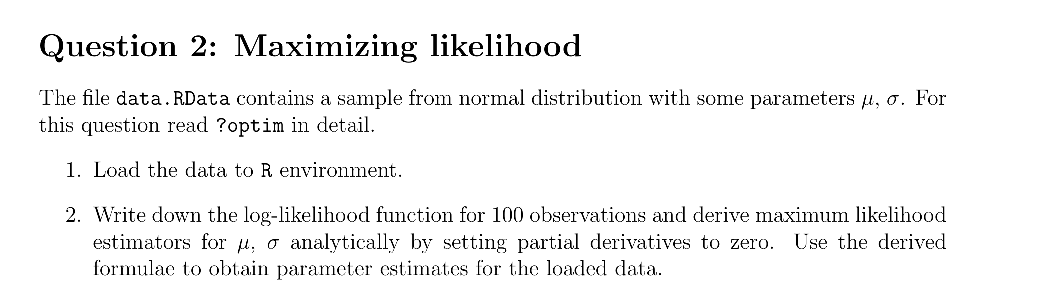

In [20]:
load('data.RData')

In [21]:
length(data)

[1] 100

### 2.

We define the log-likelihood function as the logarithm of the likelihood function:

$$\mathcal{L}_x(\vartheta) = ln(L_x(\vartheta))$$
For normal distributions we define:

$$\mathcal{L}_x(\mu, \sigma^2) = -\frac{n}{2} ln(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum^n_{i = 1} (x_i-\mu)^2$$

For a given $n = 100$ we get:

$$\mathcal{L}_x(\mu, \sigma^2) = -\frac{100}{2} ln(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum^{100}_{i=1} (x_i-\mu)^2$$

We calculate the partial derivative of log-likelihood with respect to $\mu$ and set it equal to $0$:

$$\frac{\partial \mathcal{L}}{\partial \mu} = \frac{1}{\sigma^2} \sum^{100}_{i=1}(x_i-\mu) = 0 $$

We transform our equation and get: 

$$\hat{\mu} = \frac{1}{100} \sum^{100}_{i=1}x_i$$

Now we calculate the partial derivative of log-likelihood with respect to $\sigma$ and set it equal to $0$:

$$\frac{\partial \mathcal{L}}{\partial \sigma} = -\frac{100}{2\sigma^2} - \left[\frac{1}{2}\sum^{100}_{i=1}(x_i-\mu)^2\right]\left(- \frac{1}{(\sigma^2)^2} \right) = -\frac{100}{2\sigma^2} + \left[\frac{1}{2}\sum^{100}_{i=1}(x_i-\mu)^2\right] \frac{1}{(\sigma^2)^2} = \frac{1}{2\sigma^2}\left[\frac{1}{\sigma^2}\sum^{100}_{i=1}(x_i-\mu)^2-100\right] = 0$$

We transform our equation and get:

$$\hat{\sigma}^2 = \frac{1}{100}\sum^{100}_{i=1}(x_i-\mu)^2$$

In [22]:
mu_hat = sum(data)/length(data)
sigma_hat = sqrt(sum((data-mu_hat)^2)/length(data))

cat("mu_hat: ", mu_hat, "\nsigma_hat: ", sigma_hat)

mu_hat:  1.275528 
sigma_hat:  2.005976

In [23]:
sd(data)

[1] 2.016082

In [24]:
mean(data)

[1] 1.275528

 
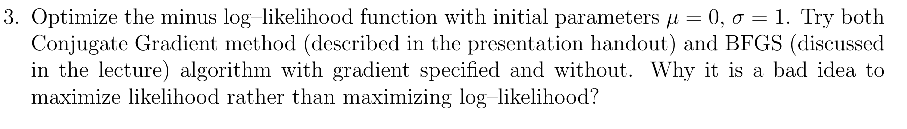

There could be issues of underflow if the difference in order of magnitude between the elements that are
summed is too big. Maximizing the log-likelihood allows to prevent this issue, because very small and very
large values can have comparable contributions to the sum.


In [25]:
minusloglike = function(par,data){
    mu = par[1]
    sig = par[2]
    n = length(data)
    
    nll = (n/2) * log(2*pi*(sig**2)) + sum((data - mu)**2)/(2* sig **2)
    return(nll)
}

In [26]:
initVal = c(0,1)
opt_cg_no_gr  = optim(initVal,fn = minusloglike,data,gr = NULL, method = "CG")

In [27]:
opt_cg_no_gr

$par
[1] 1.275528 2.005977

$value
[1] 211.5069

$counts
function gradient 
     208       35 

$convergence
[1] 0

$message
NULL

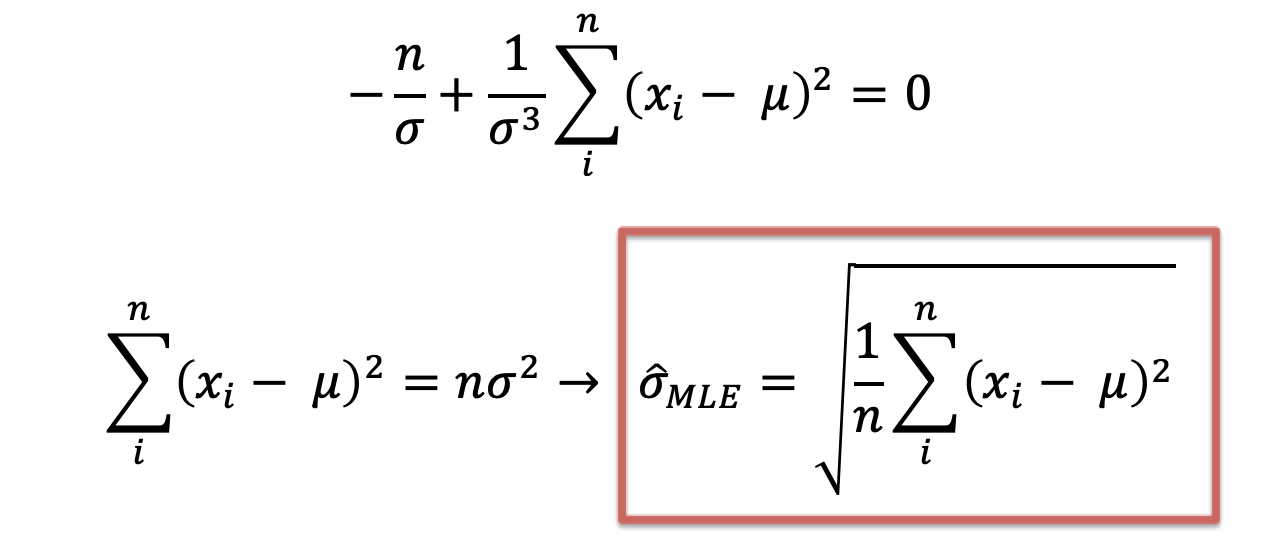

In [28]:
gradient <- function(theta,data){
mu = theta[1]
sigma = theta[2]
n = length(data)
dMu = sum(mu - data)/(sigma^2)
dSigma = (n/sigma) - (sum((data-mu)^2)/(sigma^3))
gr = c(dMu,dSigma)
return(gr)
}

In [29]:
opt_cg_gr  = optim(initVal,fn = minusloglike,data,gr = gradient, method = "CG")

In [30]:
opt_cg_gr

$par
[1] 1.275528 2.005976

$value
[1] 211.5069

$counts
function gradient 
      53       17 

$convergence
[1] 0

$message
NULL

In [31]:
initVal = c(0,1)
opt_BFGS_no_gr  = optim(initVal,fn = minusloglike,data,gr = NULL, method = "BFGS")
opt_BFGS_no_gr

$par
[1] 1.275528 2.005977

$value
[1] 211.5069

$counts
function gradient 
      41       15 

$convergence
[1] 0

$message
NULL

In [32]:
initVal = c(0,1)
opt_BFGS_gr  = optim(initVal,fn = minusloglike,data,gr = gradient,method = "BFGS")
opt_BFGS_gr

$par
[1] 1.275528 2.005977

$value
[1] 211.5069

$counts
function gradient 
      39       15 

$convergence
[1] 0

$message
NULL

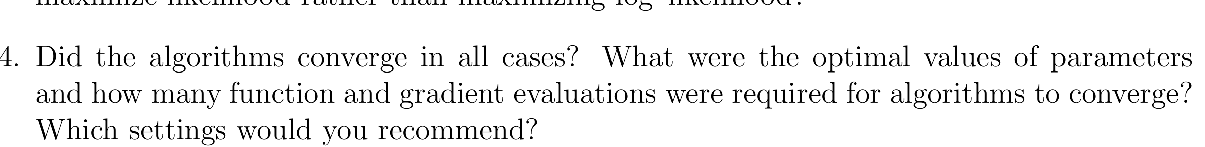


In [33]:
c(opt_cg_gr,opt_cg_no_gr,opt_BFGS_gr,opt_BFGS_no_gr)

$par
[1] 1.275528 2.005976

$value
[1] 211.5069

$counts
function gradient 
      53       17 

$convergence
[1] 0

$message
NULL

$par
[1] 1.275528 2.005977

$value
[1] 211.5069

$counts
function gradient 
     208       35 

$convergence
[1] 0

$message
NULL

$par
[1] 1.275528 2.005977

$value
[1] 211.5069

$counts
function gradient 
      39       15 

$convergence
[1] 0

$message
NULL

$par
[1] 1.275528 2.005977

$value
[1] 211.5069

$counts
function gradient 
      41       15 

$convergence
[1] 0

$message
NULL

All algorithms converged. The optimal values of parameters are pretty similar to the ones we calculated
earlier. We would recommend to use the BFGS algorithm since we observed less computations while getting
the same result.
